# Proyecto 1

##### Integrantes:

##### Mauricio López Coronado

##### Luis Alejandro Ledesma Mujica

##### Santiago Chavarria Minakata

## Minimizar el costo de instalación de una tubería de agua potable.


### Objetivo general: 
- Minimizar los costos de instalación de una tubería teniendo en cuenta las nóminas de los trabajadores, costo del material y maquinaria.

### Objetivos específicos:
- Plantear la ecuación de gasto, sus variables y restricciones según el plano de la colonia planteado.

- Desarrollar un código de optimización para reducir costos de instalación.
  
- Decidir la cantidad de personas para contratar para que el tiempo, el pago de nóminas y el desperdicio sea el menor tiempo posible.

### Información del problema:

Para este proyecto, se está realizando una urbanización en una colonia donde no tienen acceso al agua potable, (Rotoplas, 2020) es importante tener en cuenta que el gasto de las instalaciones de tuberías representan del 10-20% en instalaciones pequeñas y a gran escala pueden representar hasta el 40% del gasto total por lo que es importante usar la menor cantidad de tubo posible, optimizar las nóminas para pagar lo necesario en el menor tiempo posible.


### Consideraciones:

- Se usará el tubo de PVC, capaz de soportar una presión de 25 kg/cm2, de 100 mm de diámetro, con una longitud estándar de 5.95m.

- Se tienen 3 proveedores y son los siguientes:

- Termo plus - 8,400 pesos cada tubo, para aceptar la orden se deben pedir entre 60 y 70 tubos, esta es la cantidad válida para transportar por carretera los tubos, al exceder esta cantidad, debido a que el almacen se encuentra en Puebla, ya no es rentable debido al alto incremento de costos de transporte.

- DepotMX - 10,396 pesos cada tubo, puede suministrar la cantidad que sea, tiene una promoción que se aplica si se compran mínimo 50 tubos pero máximo 75, el precio queda 3215 pesos.

- ITSA - 10,234 pesos cada tubo y este es capaz de suministrar los tubos que sean necesarios.

- Longitud total a usar 675.9 m., se tiene que considerar un 5% de desperdicio.

- Del sistema de precios unitarios en México, se obtiene lo siguiente: 

- Para un maestro, el precio de mano de obra es de 110 pesos por hora, 

- Para un ayudante, el precio de mano de obra es de 50 pesos por hora.

- Se debe rentar una retroexcavadora, con base en un presupuesto obtenido a la constructora AB e Industrias LOSAL, la renta de una retroexcavadora CASE,  se encuentra a 500 por hora, esto ya incluye el operador.
  
- El tiempo límite para terminar el proyecto según el contratista es de 2 meses.

- En un mes, en promedio hay 22 días laborales

- A la semana el mínimo de horas es de 40, el máximo de 48.

- Según AB construye, en promedio instalar una línea de tubería de 700 m es de 20 días.

### Resumen:

Proveedor 1 - $ 8400 y mínimo 60, máximo 70 tubos.

Proveedor 2 - $ 3215 y minimo 50 tubos, máximo 75.

Proveedor 3 - $ 10,234, mayor a 0

Longitud total - 675.9 m --- con desperdicio 709.695

Maestro - 110 pesos por hora.

Ayudante - 50 pesos por hora.

2 ayudantes, un maestro y una excavadora.

Retroexcavadora 500 por hora.

A la semana mínimo 40 horas, máximo 48 cada uno.

Desperdicio margen del 5%

Una instalación de 700 metros de tubo en un caso ideal es de 20 días.

### Modelo:
El problema planteado es una optimización y con esta se busca minimizar el costo total de la instalación de la tubería, incluyendo nóminas, costos de instalación y materiales.

### Variables de control:

$ m $ --  maestros

$ a $--  ayudantes

$ t_1 $ -- tubo de proveedor 1

$ t_2$ -- tubo de proveedor 2

$ t_2$ -- tubo de proveedor 3

$ r $ -- retroexcavadora

### Función de costo 

$ f(m, a, t_1, t_2, t_3, r) = 110 m +  50 a + 8400 t_1 + 3215 t_2 + 10234 t_3 + 500 r $


costo total = costo de materiales + costo de nómina + costo de renta de equipo o maquinaria 

Se tienen las siguientes suposiciones:

Sit num1 -- con restricción de que tiempo mínimo es 15, sin desperdicio

Sit num2 -- con restricción de 25 días, 5% de desperdicio

Sit num3 -- con restricción de 35 días, 15% de desperdicio, con una multa del 10% del costo total de la obra.

### Restricciones

Longitud de la tubería:

Sit 1 - suma 3 proveedores minimo 675.9 -- sin desperdicio  

Sit 2 - suma 3 proveedores minimo 675.9 -- con desperdicio  709.695

Sit 3 - suma 3 proveedores minimo 675.9 -- con desperdicio  777.285


Horas trabajadas:

Sit 1 - terminado en 15 días laborales, 120 horas totales

Sit 2 - terminado en 25 días laborales, 200 horas totales

Sit 3 - terminado en 35 días laborales, 280 horas totales.

proveedor 1 
minimo 40 tubos
maximo 70

proveedor 2
mínimo 50 tubos
maximo 75

proveedor 3
minimo 1 tubo



# Para situación 1

### Tubos

$$ \min_{m, a, t_1, t_2, t_3, r} =  8400 t_1 + 3215 t_2 + 10234 t_3 $$
$$ s.t $$

$$ t_1 \geq 50 $$
$$ t_1 \leq 70 $$
$$ t_2 \geq 50 $$
$$ t_2 \leq 75 $$
$$ t_3 \geq 0 $$
$$ 5.95 t_1 + 5.95 t_2 + 5.95 t_3 \geq 675.9 $$



In [181]:
import numpy as np
from scipy.optimize import linprog
#8400 - costo tubo 1
#3215 - costo tubo 2
#10234 costo tubo 3


#Funcion costo
c = np.array([
    8400, 
    3215, 
    10234
])

#restricciones desigualdad
a_ub = ([
    [    -1,     0,      0], 
    [     1,     0,      0],  
    [     0,    -1,      0], 
    [     0,     1,      0],  
    [     0,     0,     -1],   
    [ -5.95, -5.95,  -5.95]   
])

b_ub =([
    -50, 
    70, 
    -50, 
    75, 
    -0, 
    -675.9])

import scipy.optimize as opt
sol = opt.linprog(c, a_ub, b_ub, integrality = 1)
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 625760.0
              x: [ 5.000e+01  6.400e+01  0.000e+00]
            nit: -1
          lower:  residual: [ 5.000e+01  6.400e+01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  2.000e+01  1.400e+01  1.100e+01
                              0.000e+00  2.400e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: 625760.0
        mip_gap: 0.0

In [183]:
costototal1 =sol.fun
costototal1

625760.0

### Trabajadores

maestros -- trabajan 40 horas a la semana   -- 8 hrs por día

ayudantes -- trabajan 40 horas a la semana  -- 8 hrs por día

Se deben tardar en completar el proyecto: 

en mínimo 120 horas totales completar 675.9 m

maestros -- 6 metros en 1 hora

ayudantes -- 2 metros en 1 hora

retro 1 fija 40 hrs semana.




$$ \min_{m, a} = 110*120 m + 50*120 a + 500(40)  $$

$$ s.t $$



el total de lo que deben hacer
$$ 6 \frac{metros}{maestro*hora} m + 2\frac{metros}{ayudante*hora} a \geq \frac{675.9 metros}{120 horas}$$

$$ 2m \leq a $$

no pueden haber maestros o ayudantes negativos
$$ m  \geq 1 $$

$$ a \geq 0 $$






In [185]:
import numpy as np
from scipy.optimize import linprog



#Funcion costo
c = np.array([
    110*120, 
    50*120
])

#restricciones desigualdad
a_ub = ([  
    [    -6,    -2], 
    [     2,    -1],
    [     -1,     0]
])

b_ub =([
    -675.9/120, 
     0,
    -1
])

import scipy.optimize as opt
sol1 = opt.linprog(c, a_ub, b_ub, integrality = 1)
sol1

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 25200.0
              x: [ 1.000e+00  2.000e+00]
            nit: -1
          lower:  residual: [ 1.000e+00  2.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 4.368e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 25200.0
        mip_gap: 0.0

In [189]:
costototal2 = sol1.fun 
costototal2

25200.0

# Costo final del proyecto en situación 1

### 650,960 pesos

## Uso de tubos

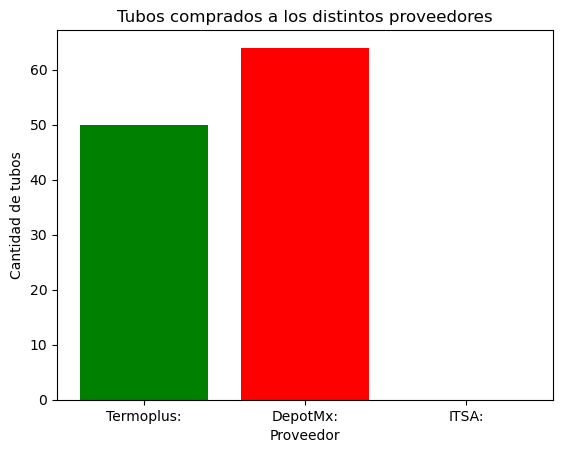

In [239]:
import matplotlib.pyplot as plt

proveedores = ["Termoplus:", "DepotMx:", "ITSA:" ]
tubos = [50, 64, 0]

plt.figure()
plt.bar(proveedores, tubos, color=["g", "r", "b"])
plt.title("Tubos comprados a los distintos proveedores")
plt.xlabel("Proveedor")
plt.ylabel("Cantidad de tubos")
plt.show()


### Misma situación, se puede decidir libremente si contratar maestros o no.

In [175]:
import numpy as np
from scipy.optimize import linprog



#Funcion costo
c = np.array([
    110*120, 
    50*120
])

#restricciones desigualdad
a_ub = ([  
    [    -6,    -2], 
    [     2,    -1],
])

b_ub =([
    -675.9/120, 
     0,
])

import scipy.optimize as opt
opt.linprog(c, a_ub, b_ub, integrality = 1)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 18000.0
              x: [ 0.000e+00  3.000e+00]
            nit: -1
          lower:  residual: [ 0.000e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.675e-01  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: 18000.0
        mip_gap: 0.0

# Para situación 2

## Tubos

$$ \min_{m, a, t_1, t_2, t_3, r} =  8400 t_1 + 3215 t_2 + 10234 t_3 $$
$$ s.t $$

$$ t_1 \geq 50 $$
$$ t_1 \leq 70 $$
$$ t_2 \geq 50 $$
$$ t_2 \leq 75 $$
$$ t_3 \geq 0 $$
$$ 5.95 t_1 + 5.95 t_2 + 5.95 t_3 \geq 709.695 $$

In [197]:
import numpy as np
from scipy.optimize import linprog
#8400 - costo tubo 1
#3215 - costo tubo 2
#10234 costo tubo 3


#Funcion costo
c = np.array([
    8400, 
    3215, 
    10234
])

#restricciones desigualdad
a_ub = ([
    [    -1,     0,      0], 
    [     1,     0,      0],  
    [     0,    -1,      0], 
    [     0,     1,      0],  
    [     0,     0,     -1],   
    [ -5.95, -5.95,  -5.95]   
])

b_ub =([
    -50, 
    70, 
    -50, 
    75, 
    -0, 
    -709.695])

import scipy.optimize as opt
sol3 = opt.linprog(c, a_ub, b_ub, integrality = 1)
sol3

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 645050.0
              x: [ 5.000e+01  7.000e+01  0.000e+00]
            nit: -1
          lower:  residual: [ 5.000e+01  7.000e+01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  2.000e+01  2.000e+01  5.000e+00
                              0.000e+00  4.305e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: 645050.0
        mip_gap: 0.0

In [199]:
costototal3 = sol3.fun 
costototal3

645050.0

## Trabajadores

maestros -- trabajan 40 horas a la semana   -- 8 hrs por día

ayudantes -- trabajan 40 horas a la semana  -- 8 hrs por día

Se deben tardar en completar el proyecto: 

en mínimo 200 horas totales completar 709.695 m

maestros -- 6 metros en 1 hora

ayudantes -- 2 metros en 1 hora

retro 1 fija 40 hrs semana.

$$ \min_{m, a} = 110*120 m + 50*120 a + 500(40)  $$

$$ s.t $$



el total de lo que deben hacer
$$ 6 \frac{metros}{maestro*hora} m + 2\frac{metros}{ayudante*hora} a \geq \frac{709.695 metros}{200 horas}$$

$$ 2m \leq a $$

no pueden haber maestros o ayudantes negativos
$$ m  \geq 1 $$

$$ a \geq 0 $$



In [203]:
import numpy as np
from scipy.optimize import linprog



#Funcion costo
c = np.array([
    110*120, 
    50*120
])

#restricciones desigualdad
a_ub = ([  
    [    -6,    -2], 
    [     2,    -1],
    [     -1,     0]
])

b_ub =([
    -709.695/200, 
     0,
    -1
])

import scipy.optimize as opt
sol4 = opt.linprog(c, a_ub, b_ub, integrality = 1)
sol4

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 25200.0
              x: [ 1.000e+00  2.000e+00]
            nit: -1
          lower:  residual: [ 1.000e+00  2.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.452e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 25200.0
        mip_gap: 0.0

In [211]:
costototal4 = sol4.fun 
costototal4

25200.0

# Costo final del proyecto en situación 2

### 670,250 pesos

## Uso de tubos

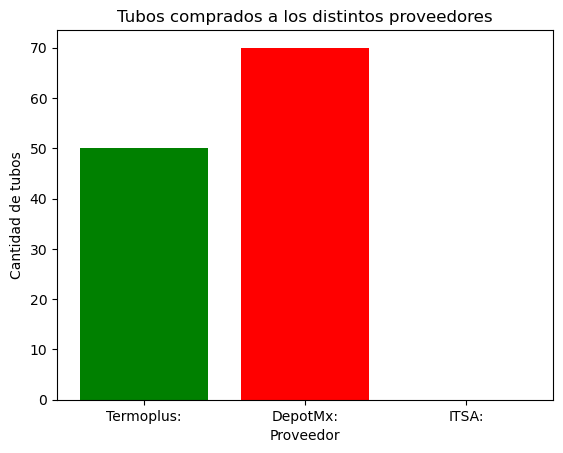

In [241]:
import matplotlib.pyplot as plt

proveedores = ["Termoplus:", "DepotMx:", "ITSA:" ]
tubos = [50, 70, 0]

plt.figure()
plt.bar(proveedores, tubos, color=["g", "r", "b"])
plt.title("Tubos comprados a los distintos proveedores")
plt.xlabel("Proveedor")
plt.ylabel("Cantidad de tubos")
plt.show()

# Para situación 3

## Tubos

$$ \min_{m, a, t_1, t_2, t_3, r} =  8400 t_1 + 3215 t_2 + 10234 t_3 $$
$$ s.t $$

$$ t_1 \geq 50 $$
$$ t_1 \leq 70 $$
$$ t_2 \geq 50 $$
$$ t_2 \leq 75 $$
$$ t_3 \geq 0 $$
$$ 5.95 t_1 + 5.95 t_2 + 5.95 t_3 \geq 777.285 $$

In [213]:

import numpy as np
from scipy.optimize import linprog
#8400 - costo tubo 1
#3215 - costo tubo 2
#10234 costo tubo 3


#Funcion costo
c = np.array([
    8400, 
    3215, 
    10234
])

#restricciones desigualdad
a_ub = ([
    [    -1,     0,      0], 
    [     1,     0,      0],  
    [     0,    -1,      0], 
    [     0,     1,      0],  
    [     0,     0,     -1],   
    [ -5.95, -5.95,  -5.95]   
])

b_ub =([
    -50, 
    70, 
    -50, 
    75, 
    -0, 
    -777.285])

import scipy.optimize as opt
sol5 = opt.linprog(c, a_ub, b_ub, integrality = 1)
sol5

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 711525.0
              x: [ 5.600e+01  7.500e+01  0.000e+00]
            nit: -1
          lower:  residual: [ 5.600e+01  7.500e+01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 6.000e+00  1.400e+01  2.500e+01  0.000e+00
                              0.000e+00  2.165e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
 mip_node_count: 1
 mip_dual_bound: 711525.0
        mip_gap: 0.0

In [215]:
costototal5 = sol5.fun 
costototal5

711525.0

## Trabajadores

$$ \min_{m, a} = 110*120 m + 50*120 a + 500(40)  $$

$$ s.t $$



el total de lo que deben hacer
$$ 6 \frac{metros}{maestro*hora} m + 2\frac{metros}{ayudante*hora} a \geq \frac{777.285 metros}{280 horas}$$

$$ 2m \leq a $$

no pueden haber maestros o ayudantes negativos
$$ m  \geq 1 $$

$$ a \geq 0 $$

In [217]:
import numpy as np
from scipy.optimize import linprog



#Funcion costo
c = np.array([
    110*120, 
    50*120
])

#restricciones desigualdad
a_ub = ([  
    [    -6,    -2], 
    [     2,    -1],
    [     -1,     0]
])

b_ub =([
    -777.285/280, 
     0,
    -1
])

import scipy.optimize as opt
sol6 = opt.linprog(c, a_ub, b_ub, integrality = 1)
sol6

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 25200.0
              x: [ 1.000e+00  2.000e+00]
            nit: -1
          lower:  residual: [ 1.000e+00  2.000e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 7.224e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 25200.0
        mip_gap: 0.0

In [219]:
costototal6 = sol6.fun 
costototal6

25200.0

# Costo final del proyecto en situación 3

### 736,725 pesos

## Uso de tubos

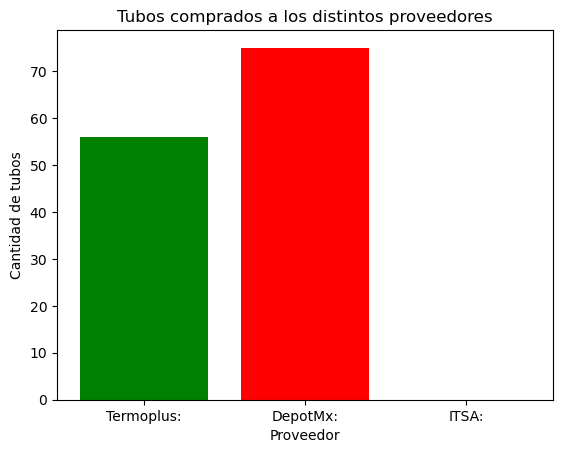

In [245]:
import matplotlib.pyplot as plt

proveedores = ["Termoplus:", "DepotMx:", "ITSA:" ]
tubos = [56, 75, 0]

plt.figure()
plt.bar(proveedores, tubos, color=["g", "r", "b"])
plt.title("Tubos comprados a los distintos proveedores")
plt.xlabel("Proveedor")
plt.ylabel("Cantidad de tubos")
plt.show()

# Gráficas comparativas de las 3 situaciones

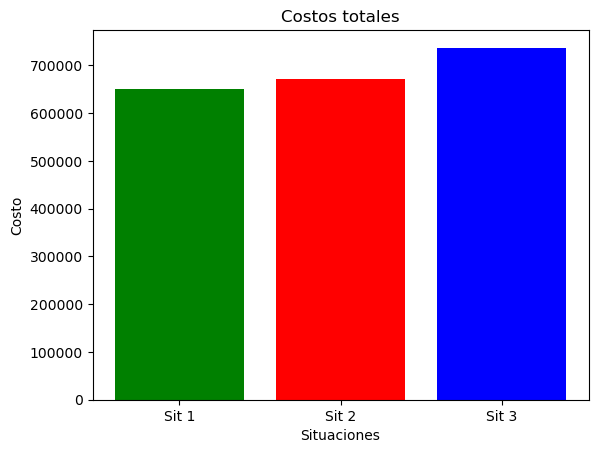

In [233]:
import matplotlib.pyplot as plt
import numpy as np

situaciones = ['Sit 1', 'Sit 2', 'Sit 3']
costo = [650960, 670250, 736725]
plt.bar(situaciones, costo, color=["g", "r", "b"])
plt.title("Costos totales")
plt.xlabel("Situaciones")
plt.ylabel("Costo")
plt.show()

## Conclusiones

De la optimización, podemos ver que fue logrado el propósito ya que la cantidad de tubos fue la menor respecto a las restricciones de los distintos proveedores, en las 3 situaciones se disminuyó el uso de tubos.

Respecto a las nóminas, queda muy condicionado ya que para una obra es necesario que haya un maestro, por lo que en las tres situaciones se obtiene que se necesitan 2 ayudantes y un maestro.

Se elaboró otra prueba sin la restricción del maestro, y se obtuvo que se necesitan 3 ayudantes, esto disminuye considerablemente el costo de la mano de obra pero no es posible aceptar esta situción.

Se logró ver como cambia el presupuesto en las tres situaciones, en la ideal, en la que tiene un pequeño problema y en la peor.

Podemos ver que los objetivos se cumplieron ya que al compararse uno con otro los resultados si cambian y en el mejor caso el costo es menor.

### Bibliografía

Medina F, (2024), Fraccionamiento en AutoCAD (729.14 KB) | Bibliocad https://www.bibliocad.com/es/biblioteca/fraccionamiento_49634/#google_vignette

PUC (2023, 20 septiembre). Precio unitario de colocación de 【 Tubería de PVC 】. Precios Unitarios de Construcción. https://preciosunitariosconstruccion.com/obra-civil/tuberia-pvc/#:~:text=El%20precio%20unitario%20de%20instalaci%C3%B3n%20de%20tuber%C3%ADa%20de%20PVC%20por

Rotoplas. (2020). Guía completa sobre los diámetros de tubería hidráulica: ¿Cómo elegir el tamaño adecuado para tu proyecto? Rotoplas.com.mx. Recuperado 25 de septiembre de 2024, de https://rotoplas.com.mx/guia-completa-sobre-los-diametros-de-tuberia-hidraulica-como-elegir-el-tamano-adecuado-para-tu-proyecto/#:~:text=Tuboplus%20ofrece%20amplitud%20de%20opciones.%20Por%20ejemplo,%20Tuboplus%20Fortech-CT%20cuenta

Termoplus (2024).  Tubo PVC orientado Clase 500 Agua potable | Cotizador online. https://termoplus.mx/cotizador/agua-potable/tubo-pvc-orientado-clase-500#:~:text=Tubo%20de%20PVC%20Orientado%20Clase%20500%20para%20presiones%2012.5,%2016,

TUBO PVC HIDRÁULICO CLASE 10(145PSI) 315MM(12) 6MT. (2024). ITSAMEXICO. https://www.itsamexico.com/shop/tuh-c10-315-tubo-pvc-hidraulico-clase-10-145psi-315mm-12-6mt-11860#attr=

TUBO PVC CAMP/ANILLO RD 32.5 200MM de 8″(tramo 6 mts). (2022). DepotMX. https://depotmx.com/producto/tubo-pvc-camp-anillo-rd-32-5-200mm/

Barrientos A, (2024) AB Construye.

López F, (2024) Industrias Losal.

